In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

['images', '.ipynb_checkpoints']


In [5]:
path = 'input/images/footwear/'

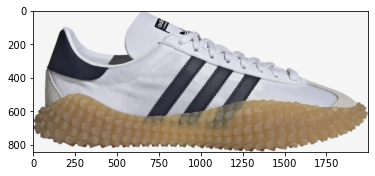

In [7]:
import matplotlib.pyplot as plt
img_path = os.path.join(path, "A_EE5665.tif")
img = plt.imread(img_path)
fig = plt.figure(0)
plt.imshow(img)
plt.show()

In [10]:
!conda install pillow

Solving environment: done

# All requested packages already installed.



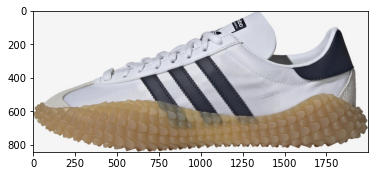

In [14]:
from PIL import Image, ImageOps
im = Image.open(os.path.join(path, "A_EE5665.tif"))
im_mirror = ImageOps.mirror(im)
plt.imshow(im_mirror)

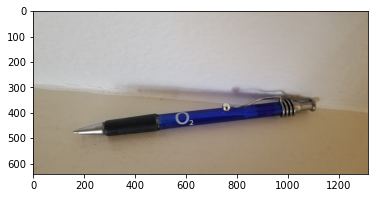

In [18]:
pen_im = Image.open(os.path.join(path, "pen.jpg"))
pen_mirrir_im = ImageOps.mirror(pen_im)
plt.imshow(pen_im)

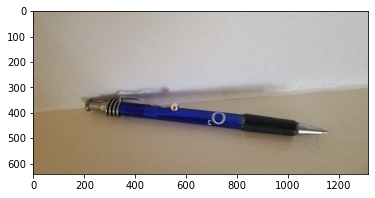

In [19]:
plt.imshow(pen_mirrir_im)

In [24]:
np.asarray(pen_im).shape

(640, 1316, 3)

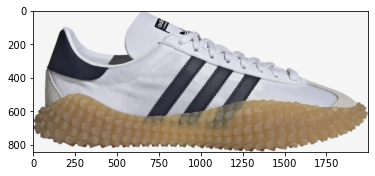

In [12]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open(os.path.join(path, "A_EE5665.tif"), 'r')
imshow(np.asarray(pil_im))

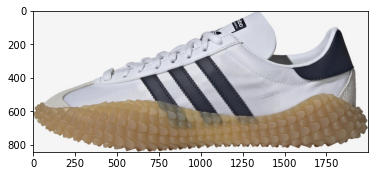

In [25]:
imshow(np.array(im_mirror))

In [26]:
np.asarray(pil_im).shape

(844, 2000, 3)

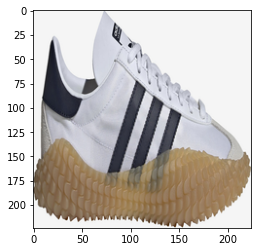

In [27]:
pil_im = pil_im.resize((224,224),Image.ANTIALIAS)
imshow(np.asarray(pil_im))

In [28]:
os.walk(path_fullsize)

NameError: name 'path_fullsize' is not defined

In [28]:
size_x = 224
size_y = 224

processing 86 images...


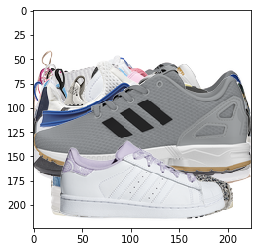

In [34]:
for _, _, all_images in os.walk(path_fullsize):
    print("processing %i images..." % len(all_images))
    for image_name in all_images:
        fullsize_img = Image.open(os.path.join(path_fullsize, image_name))
        resized_img = fullsize_img.resize((size_x, size_y), Image.ANTIALIAS)
        imshow(np.asarray(resized_img))
        resized_img.save(os.path.join(path_resized, image_name), "TIFF")
        #resized_img.save(os.path.join(path_resized, str.replace(image_name, ".tif", ".png")), "PNG")

In [9]:
path = '../input/images/footwear/'
path_fullsize = os.path.join(path, "test/")
path_resized = os.path.join(path, "resized/")

In [ ]:
import os
from PIL import Image

for root, dirs, files in os.walk(path_fullsize, topdown=False):
    for file in files:
        print(os.path.join(root, file))
        if os.path.splitext(os.path.join(root, file))[1].lower() == ".tif":
            if os.path.isfile(os.path.splitext(os.path.join(root, file))[0] + ".jpg"):
                print("A jpeg file already exists for %s" %(file))
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root, file))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root, file))
                    print("Generating jpeg for %s" %(file))
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except Exception as e:
                    print(e)

In [14]:
import numpy as np
import cv2

img = cv2.imread(os.path.join(path_fullsize,'A_CM8192.tif'),0)

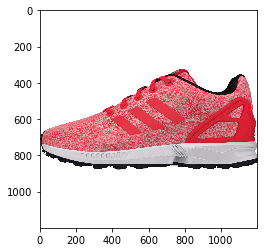

In [11]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open(os.path.join(path_fullsize, "A_CM8025.tif"), 'r')
imshow(np.asarray(pil_im))

In [33]:
pil_im.getbands()

('R', 'G', 'B', 'X')

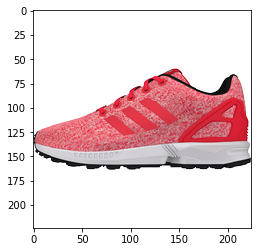

In [12]:
pil_im = pil_im.resize((224,224),Image.ANTIALIAS)
imshow(np.asarray(pil_im))

In [15]:
im = np.asarray(pil_im)
gray=cv2.cvtColor(np.asarray(pil_im),cv2.COLOR_BGR2GRAY)

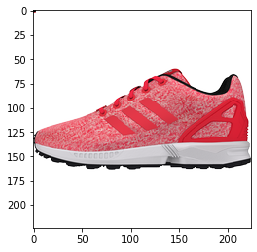

In [26]:
contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=im[y:y+h,x:x+w]
    cv2.imwrite(str(idx) + '.jpg', roi)
    #cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
    #imshow(np.asarray(im))
    imshow(np.asarray(roi))

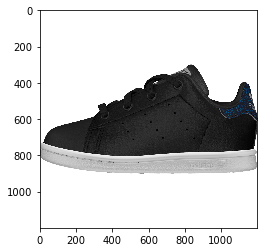

In [82]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open(os.path.join(path_fullsize, "A_CM8184.tif"), 'r')
imshow(np.asarray(pil_im))

In [83]:
def crop_to_content_and_resize(image, target_size):
    """
    crop input image to use the content only then resize to the target size

    :param image: original image
    :param target_size:
    :return: resized image
    """

    bbox = image.getchannel("X").getbbox()
    
    print(bbox)

    # use the full image if there is no bounding box
    if not bbox:
        bbox = (0, 0, *image.size)

    # alpha channel with the full image?
    if bbox == (0, 0, *image.size):
        return None

    image_width = bbox[2] - bbox[0]
    image_height = bbox[3] - bbox[1]
    
    print(image_width, image_height)

    if image_width < image_height:
        # center image
        fix_x = (image_height - image_width) // 2
        small_image = image.transform((target_size, target_size), Image.EXTENT,
                                      data=(bbox[0] - fix_x, bbox[1], bbox[2] + fix_x, bbox[3]),
                                      resample=Image.BILINEAR)
    else:
        # use bottom
        fix_y = (image_width - image_height)
        small_image = image.transform((target_size, target_size), Image.EXTENT,
                                      data=(bbox[0], bbox[1] - fix_y, bbox[2], bbox[3]),
                                      resample=Image.BILINEAR)

    return small_image

(0, 299, 1200, 902)
1200 603


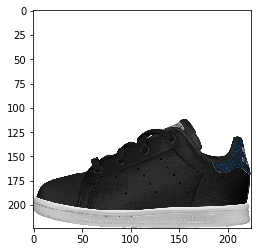

In [84]:
imshow(np.asarray(crop_to_content_and_resize(pil_im,target_size=224)))

In [85]:
background = Image.new("RGB", pil_im.size, (255, 255, 255))

In [86]:
background.paste(pil_im, mask=pil_im.split()[0])